In [1]:
import pandas as pd # Tabular data
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 500)
from glob import glob # Finding files
from tqdm.auto import tqdm # Progress bars
tqdm.pandas()
import matplotlib.pyplot as plt
from tqdm.contrib.concurrent import thread_map, process_map # Parallel processing
# Simpson diversity index
from skbio.diversity.alpha import simpson
files = sorted(glob("data/*.csv"))
print(len(files))

/usr/local/lib/python3.10/dist-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


48


In [2]:
df = pd.concat(process_map(pd.read_csv, files))
df

100%|██████████| 48/48 [01:29<00:00,  1.87s/it]


,placekey,parent_placekey,safegraph_brand_ids,location_name,brands,store_id,top_category,sub_category,naics_code,latitude,longitude,street_address,city,region,postal_code,open_hours,category_tags,opened_on,closed_on,tracking_closed_since,websites,geometry_type,polygon_wkt,polygon_class,enclosed,phone_number,is_synthetic,includes_parking_lot,iso_country_code,wkt_area_sq_meters
0,zzy-222@53r-msd-cwk,NaN,NaN,PROFLYTEC Insektenschutz systemtechnik,NaN,NaN,Home Furnishings Stores,NaN,4422.0,49.237125,10.957152,Spalter Straße 54,Abenberg,Bayern,91183,NaN,Blinds,NaN,NaN,2019-07,"[""proflytec.de""]",POLYGON,"POLYGON ((10.956793 49.237192, 10.957265 49.23...",OWNED_POLYGON,False,NaN,False,False,DE,834.0
1,22q-223@627-wdm-fvf,NaN,NaN,86 Fresh Cuts barber shop,NaN,NaN,Personal Care Services,"Hair, Nail, and Skin Care Services",81211.0,40.606801,-74.002175,1818 86th St Unit 3,Brooklyn,NY,11214,"{ ""Mon"": [[""9:45"", ""19:00""]], ""Tue"": [[""9:45"",...",Barber,NaN,NaN,2019-07,[],POLYGON,POLYGON ((-74.00215897299995 40.60679270000003...,SHARED_POLYGON,False,1.347615e+10,False,False,US,1678.0
2,zzy-222@53d-4bp-7kf,NaN,NaN,Hotel Restaurant du Donon,NaN,NaN,Traveler Accommodation,Hotels (except Casino Hotels) and Motels,721110.0,48.636245,7.097949,57 Rue Pierre Marie,Abreschviller,Moselle,57560,NaN,NaN,NaN,NaN,2019-07,[],POLYGON,"POLYGON ((7.098200450232434 48.6362644, 7.0981...",OWNED_POLYGON,False,3.338724e+10,True,NaN,FR,1236.0
3,zzy-222@65x-9cf-kcq,NaN,NaN,OC Transpo KANATA ROBSON,NaN,OC Transpo_s-f241b3mbh9-kanata~robson,Urban Transit Systems,Bus and Other Motor Vehicle Transit Systems,485113.0,45.314523,-75.918427,Kanata Robson,Kanata,ON,K2K,NaN,"Bus Station,Buses",NaN,NaN,2019-07,[],POINT,NaN,NaN,NaN,NaN,NaN,NaN,CA,NaN
4,zzy-222@4xv-jmj-7t9,NaN,NaN,Zodiak,NaN,NaN,Drinking Places (Alcoholic Beverages),Drinking Places (Alcoholic Beverages),722410.0,50.143463,18.684148,Ul. Parkowa,Czerwionka-leszczyny,Silesian,44-230,NaN,"Bar or Pub,Late Night",NaN,NaN,2019-07,[],POLYGON,"POLYGON ((18.684408780693975 50.1434433, 18.68...",SHARED_POLYGON,False,4.860759e+10,True,NaN,PL,1236.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701937,zzy-22b@5x6-rfw-vmk,NaN,NaN,TransLink PORT COQUITLAM STN BAY 6,NaN,NaN,Urban Transit Systems,Bus and Other Motor Vehicle Transit Systems,485113.0,49.261032,-122.774148,Port Coquitlam Stn Bay 6,Port Coquitlam,BC,V3C,NaN,"Bus Station,Buses",NaN,NaN,2019-07,[],POINT,NaN,NaN,NaN,NaN,NaN,NaN,CA,NaN
701938,zzy-226@4zh-p7k-8jv,NaN,NaN,Er Med Tıbbi Cihazlar,NaN,NaN,Health and Personal Care Stores,Food (Health) Supplement Stores,446191.0,40.989680,29.050359,Eğitim Mah.,Istanbul,Istanbul,34722,NaN,Gourmet,NaN,NaN,2019-07,[],POLYGON,"POLYGON ((29.050594369161516 40.9896682, 29.05...",SHARED_POLYGON,False,9.021655e+11,True,NaN,TR,1236.0
701939,222-223@5pv-fvr-3t9,NaN,NaN,Illinois Portable Toilets,NaN,NaN,Waste Management and Remediation Services,NaN,562.0,39.863271,-88.946319,800 E Garfield Ave,Decatur,IL,62526,NaN,Portable Toilet Services,NaN,NaN,2019-07,[],POLYGON,POLYGON ((-88.94631519599994 39.86517597600004...,SHARED_POLYGON,False,1.217424e+10,False,False,US,19170.0
701940,zzy-222@62m-24b-p5f,NaN,NaN,Starbird Cemetery,NaN,1907880,Death Care Services,Cemeteries and Crematories,812220.0,44.072859,-69.912478,Starbird Cemetery,Bowdoin,ME,04287,NaN,NaN,NaN,NaN,2019-07,[],POLYGON,"POLYGON ((-69.91224334425186 44.0728473, -69.9...",OWNED_POLYGON,False,NaN,True,NaN,US,1236.0


In [3]:
df.naics_code = df.naics_code.astype(str)

In [4]:
df.memory_usage().sum() / 1e9

6.18281856

In [5]:
# Retail Trade + Accommodation and Food Services
# See https://www.naics.com/search/
retail = df.naics_code.str.startswith(("44","45","72"))
retail.value_counts(dropna=False)

naics_code
False    16883611
True      8047109
Name: count, dtype: int64

In [6]:
# Drop non-retail
df = df[retail].copy()

In [7]:
df.top_category.value_counts()

top_category
Restaurants and Other Eating Places                                       2064637
Grocery Stores                                                             806273
Clothing Stores                                                            645688
Gasoline Stations                                                          450957
Health and Personal Care Stores                                            434557
Traveler Accommodation                                                     362986
Automobile Dealers                                                         283205
Drinking Places (Alcoholic Beverages)                                      281406
Specialty Food Stores                                                      248872
Furniture Stores                                                           238602
Electronics and Appliance Stores                                           213006
Home Furnishings Stores                                                    196289
Jew

In [8]:
top = df.top_category.value_counts().values
sub = df.sub_category.value_counts().values
simpson([1]), simpson([1,1]), simpson([1] *  100), simpson([1,2,3]), simpson(top), simpson(sub)

(0.0, 0.5, 0.99, 0.6111111111111112, 0.9002871633074666, 0.9432285872271319)

In [9]:
df.iso_country_code.value_counts()

iso_country_code
US    3405678
DE     682536
GB     637029
PL     601721
FR     378805
IT     342192
CA     308463
ES     302388
TR     187263
PT     145294
SE     116099
AT      89291
CH      85822
BE      71311
NL      64507
CZ      64299
DK      55204
NO      49278
RU      43216
FI      42442
JP      41882
CN      34040
AU      33658
IN      30072
MX      29641
BR      26314
TH      13882
TW      12012
PH      11281
MY      10804
KR      10512
ZA      10197
CO       6962
ID       6664
AR       6610
IE       6489
RO       5695
CL       5057
NZ       4860
HU       4450
SA       4236
GR       3895
AE       3489
SG       3024
PE       2945
UA       2189
PK       2141
HR       1658
SK       1651
GT       1500
EG       1450
MA       1361
IL       1353
BG       1281
SI       1198
VN       1197
LT       1164
KW       1051
EC       1037
DO        912
GH        911
LU        908
RS        862
LV        838
JO        807
EE        800
QA        793
PA        729
TN        697
CR        682
KE 

In [10]:
df[df.iso_country_code == "NZ"]

,placekey,parent_placekey,safegraph_brand_ids,location_name,brands,store_id,top_category,sub_category,naics_code,latitude,longitude,street_address,city,region,postal_code,open_hours,category_tags,opened_on,closed_on,tracking_closed_since,websites,geometry_type,polygon_wkt,polygon_class,enclosed,phone_number,is_synthetic,includes_parking_lot,iso_country_code,wkt_area_sq_meters
721,zzy-222@r3k-4k8-mrk,NaN,SG_BRAND_da46ad6f82825669a56b44d32564dff8,Domino's Pizza,Domino's Pizza,98696,Restaurants and Other Eating Places,Limited-Service Restaurants,722513.0,-44.693980,169.139663,34 Ardmore St,Wanaka,Otago,9305,"{ ""Mon"": [[""15:00"", ""21:00""]], ""Tue"": [[""15:00...","Counter Service,Pizza,Sandwich Shop,Lunch,Dinner",NaN,NaN,NaN,"[""dominos.nl""]",POLYGON,POLYGON ((169.13959041409075 -44.6940132612757...,OWNED_POLYGON,False,6.437468e+09,False,False,NZ,92.0
1485,zzy-222@r3k-wqv-7bk,NaN,SG_BRAND_0e24d4e00d6913d8,Z,Z,72,Gasoline Stations,Gasoline Stations with Convenience Stores,447110.0,-44.356122,171.251746,55 Sheffield Street,NaN,Canterbury,7910,"{ ""Mon"": [[""0:00"", ""24:00""]], ""Tue"": [[""0:00"",...","Propane,Car Wash,Tires,Coffee Shop,Oil Changes",NaN,NaN,2022-04,"[""z.co.nz""]",POLYGON,"POLYGON ((171.2520023149362 -44.3561007873296,...",OWNED_POLYGON,False,NaN,True,NaN,NZ,1236.0
9012,zzy-222@n84-d7c-w49,NaN,SG_BRAND_618343c29fedc43238864550bf2477a9,Ben & Jerry's,Ben & Jerry's,NZ006,Restaurants and Other Eating Places,Snack and Nonalcoholic Beverage Bars,722515.0,-36.728336,174.708589,219 Don Mckinnon Drive,Auckland,Auckland,0632,NaN,"Snacks,Counter Service,Ice Cream Shop,Catering...",NaN,NaN,2022-05,"[""benjerry.com.au""]",POLYGON,"POLYGON ((174.70883469023812 -36.7283493, 174....",OWNED_POLYGON,False,NaN,True,NaN,NZ,1236.0
9656,zzy-222@n7q-mhv-7yv,NaN,SG_BRAND_3df7453748507d4ea82277d2d0420de5,Armstrong Prestige Wellington,Volvo,NaN,Automobile Dealers,New Car Dealers,441110.0,-41.297874,174.781098,6 Barker Street Te Aro,Wellington,Wellington,6011,NaN,NaN,NaN,NaN,2022-05,"[""volvocars.com""]",POLYGON,POLYGON ((174.7812927730041 -41.29807298007156...,OWNED_POLYGON,False,6.443849e+09,False,False,NZ,1402.0
15220,zzy-222@r3k-9b8-v75,NaN,SG_BRAND_581e16e65ed8ffea,Countdown,Countdown,9442,Grocery Stores,Supermarkets and Other Grocery (except Conveni...,445110.0,-45.896727,170.509233,560 Andersons Bay Road,Dunedin,Otago,9012,"{ ""Mon"": [[""7:00"", ""22:00""]], ""Tue"": [[""7:00"",...","Chicken,Meats,Healthy Food,Seafood,Beverages",NaN,NaN,2021-12,"[""countdown.co.nz""]",POLYGON,"POLYGON ((170.50946769990549 -45.89671, 170.50...",OWNED_POLYGON,False,6.434663e+09,True,NaN,NZ,1236.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
682507,zzy-223@n84-d3d-9s5,NaN,SG_BRAND_de80593878cb1673c62a7f338dc7e4e1,Subway,Subway,22949-0,Restaurants and Other Eating Places,Limited-Service Restaurants,722513.0,-36.782082,174.721604,"Cnr Glenfield Rd & Downing St, Shop S504, Glen...","Glenfield, Auckland",Auckland,0629,"{ ""Mon"": [[""7:00"", ""21:30""]], ""Tue"": [[""7:00"",...","Counter Service,Sandwich Shop,Lunch,Breakfast,...",NaN,NaN,2022-05,"[""subway.com""]",POLYGON,POLYGON ((174.72154971915558 -36.7820225634601...,OWNED_POLYGON,False,6.494441e+09,False,False,NZ,113.0
686460,zzy-225@n85-knv-9j9,NaN,SG_BRAND_bcbed4ad551e5a55,Jay Jays,Jay Jays,36631,Clothing Stores,Children's and Infants' Clothing Stores,448130.0,-37.785422,175.281794,501 Victoria Street,Hamilton,Waikato,3204,NaN,NaN,NaN,NaN,2022-02,"[""jayjays.com.au""]",POLYGON,"POLYGON ((175.28202704056076 -37.7854, 175.282...",SHARED_POLYGON,False,NaN,True,NaN,NZ,1236.0
688716,zzy-222@n84-d5p-vfz,NaN,SG_BRAND_bd24e51034479e400ca242c0e7016c60,Pita Pit,Pita Pit,NaN,Restaurants and Other Eating Places,Limited-Service Restaurants,722513.0,-36.913484,174.840789,286 Mount Wellington Hwy,Auckland,Auckland,1060,"{ ""Mon"": [[""9:00"", ""19:00""]], ""Tue"": [[""9:00"",...","Counter Service,Sandwich Shop,Lunch,Fast Food,..."

In [11]:
df.loc[~df.opened_on.isna() & ~df.closed_on.isna(), ["opened_on", "closed_on"]]

,opened_on,closed_on
631,2022-05,2022-07
3245,2022-01,2022-05
5591,2020-09,2020-10
5599,2021-08,2022-04
7074,2020-01,2020-07
...,...,...
685944,2020-01,2020-02
685997,2021-04,2021-07
687470,2021-05,2021-08
689423,2021-05,2021-06


<Axes: >

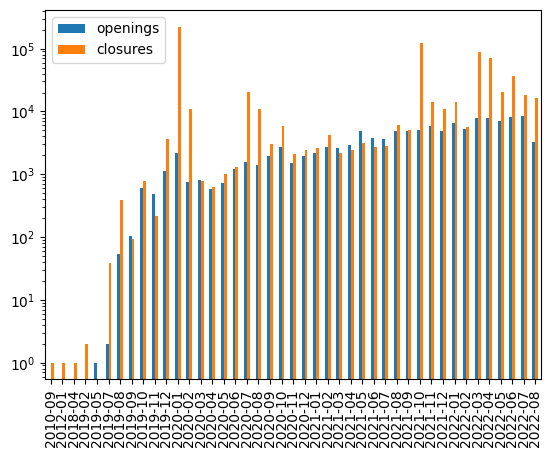

In [12]:
open_close_df = pd.DataFrame({
    "openings": df.opened_on.value_counts(), 
    "closures": df.closed_on.value_counts()
})
open_close_df.plot.bar(logy=True)

In [13]:
# See https://docs.safegraph.com/docs/places-rich-attributes#section-determining-when-poi-open-and-close
start_date = "2020-03"
end_date = "2023-03"
df["open_pre_pandemic"] = (df.opened_on.isna() | (df.opened_on < start_date)) & (df.closed_on.isna() | (df.closed_on > start_date))
df["open_post_pandemic"] = (df.opened_on.isna() | (df.opened_on < end_date)) & (df.closed_on.isna() | (df.closed_on > end_date))
pre_retail = sum(df.open_pre_pandemic)
post_retail = sum(df.open_post_pandemic)
print(f"Globally, there were {pre_retail} retail locations open prior to {start_date}, and {post_retail} retail locations open after {end_date}.")
delta = post_retail - pre_retail
print(f"This is an change of {delta}, which is {delta/pre_retail:.2%}")

Globally, there were 7689347 retail locations open prior to 2020-03, and 7309895 retail locations open after 2023-03.
This is an change of -379452, which is -4.93%


In [14]:
df.loc[~df.opened_on.isna() & ~df.closed_on.isna() & df.open_pre_pandemic & ~df.open_post_pandemic, ["opened_on", "closed_on", "open_pre_pandemic", "open_post_pandemic"]]

,opened_on,closed_on,open_pre_pandemic,open_post_pandemic
7074,2020-01,2020-07,True,False
19669,2020-01,2020-10,True,False
28664,2019-08,2022-06,True,False
92683,2019-10,2022-01,True,False
118871,2020-02,2021-01,True,False
...,...,...,...,...
422334,2020-01,2021-04,True,False
424056,2020-01,2020-10,True,False
447521,2019-11,2022-07,True,False
512440,2020-01,2020-10,True,False


In [15]:
def calculate_metrics(group):
    open_pre_pandemic = sum(group.open_pre_pandemic)
    open_post_pandemic = sum(group.open_post_pandemic)
    delta = open_post_pandemic - open_pre_pandemic
    if open_pre_pandemic:
        percentage_change = delta / open_pre_pandemic * 100
    else:
        percentage_change = pd.NA
    return pd.Series({
        "n_open_pre_pandemic": open_pre_pandemic,
        "n_open_post_pandemic": open_post_pandemic,
        "delta": delta,
        "percentage_change": percentage_change,
        "diversity_pre_pandemic_top_category": simpson(group.top_category[group.open_pre_pandemic].value_counts().values),
        "diversity_post_pandemic_top_category": simpson(group.top_category[group.open_post_pandemic].value_counts().values),
        "diversity_pre_pandemic_sub_category": simpson(group.sub_category[group.open_pre_pandemic].value_counts().values),
        "diversity_post_pandemic_sub_category": simpson(group.sub_category[group.open_post_pandemic].value_counts().values),
    })
by_country = df.groupby("iso_country_code").apply(calculate_metrics)
by_country.sort_values(by="n_open_pre_pandemic", ascending=False)

,n_open_pre_pandemic,n_open_post_pandemic,delta,percentage_change,diversity_pre_pandemic_top_category,diversity_post_pandemic_top_category,diversity_pre_pandemic_sub_category,diversity_post_pandemic_sub_category
iso_country_code,,,,,,,,
US,3092324.0,2744935.0,-347389.0,-11.233913,0.876914,0.883671,0.934108,0.939819
DE,680608.0,681040.0,432.0,0.063473,0.870606,0.870619,0.945001,0.944917
GB,628015.0,628244.0,229.0,0.036464,0.914882,0.914535,0.939968,0.937962
PL,600086.0,601320.0,1234.0,0.205637,0.843966,0.843567,0.792917,0.793637
FR,377229.0,377946.0,717.0,0.190070,0.899384,0.899539,0.922000,0.922238
IT,341333.0,340982.0,-351.0,-0.102832,0.896966,0.896969,0.912028,0.912092
ES,300459.0,301113.0,654.0,0.217667,0.903311,0.903060,0.929134,0.929316
CA,299602.0,257102.0,-42500.0,-14.185486,0.878902,0.890422,0.936114,0.944835
TR,186670.0,187061.0,391.0,0.209461,0.901117,0.900877,0.924635,0.924863


In [16]:
display((by_country.diversity_post_pandemic_top_category - by_country.diversity_pre_pandemic_top_category).describe())
(by_country.diversity_post_pandemic_sub_category - by_country.diversity_pre_pandemic_sub_category).describe()

count    203.000000
mean      -0.000784
std        0.011740
min       -0.081407
25%       -0.000788
50%        0.000000
75%        0.000152
max        0.070248
dtype: float64

count    203.000000
mean      -0.000677
std        0.011857
min       -0.081407
25%       -0.000385
50%        0.000000
75%        0.000519
max        0.070248
dtype: float64

In [17]:
by_region = df.groupby(["region", "iso_country_code"]).apply(calculate_metrics).reset_index().sort_values(by="n_open_pre_pandemic", ascending=False)
by_region.head(50)

,region,iso_country_code,n_open_pre_pandemic,n_open_post_pandemic,delta,percentage_change,diversity_pre_pandemic_top_category,diversity_post_pandemic_top_category,diversity_pre_pandemic_sub_category,diversity_post_pandemic_sub_category
868,CA,US,416273.0,360695.0,-55578.0,-13.351334,0.867385,0.874593,0.928270,0.934822
4264,TX,US,262633.0,237198.0,-25435.0,-9.684617,0.869706,0.875466,0.931412,0.936409
1450,FL,US,213248.0,188404.0,-24844.0,-11.650285,0.881826,0.889708,0.933351,0.940037
2963,NY,US,211005.0,179737.0,-31268.0,-14.818606,0.848928,0.860830,0.914181,0.923937
3101,Nordrhein-Westfalen,DE,129345.0,129356.0,11.0,0.008504,0.871334,0.871303,0.946296,0.946262
3195,ON,CA,121184.0,102886.0,-18298.0,-15.099353,0.870269,0.884327,0.930433,0.941741
663,Bayern,DE,118823.0,118894.0,71.0,0.059753,0.869688,0.869776,0.942899,0.942819
3283,PA,US,113479.0,100450.0,-13029.0,-11.481419,0.877503,0.886084,0.929963,0.937012
1864,IL,US,107872.0,94209.0,-13663.0,-12.665937,0.867506,0.875265,0.928671,0.935908
1525,GA,US,96476.0,87519.0,-8957.0,-9.284174,0.880348,0.885255,0.934973,0.939063


In [18]:
display((by_region.diversity_post_pandemic_top_category - by_region.diversity_pre_pandemic_top_category).describe())
(by_region.diversity_post_pandemic_sub_category - by_region.diversity_pre_pandemic_sub_category).describe()

count    5183.000000
mean       -0.009436
std         0.148929
min        -1.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
dtype: float64

count    5183.000000
mean       -0.009166
std         0.148606
min        -1.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
dtype: float64

In [19]:
vc = (df.city + "," + df.iso_country_code).value_counts()
cities = vc.index[vc > 1000]
cities

Index(['London,GB', 'Istanbul,TR', 'New York,US', 'Los Angeles,US',
       'Houston,US', 'Berlin,DE', 'Warsaw,PL', 'Paris,FR', 'Madrid,ES',
       'Chicago,US',
       ...
       'Krosno,PL', 'Greenfield,US', 'Kirkland,US', 'Metz,FR', 'Aarhus,DK',
       'Stafford,US', 'Slidell,US', 'Głogów,PL', 'Jefferson,US',
       'Murrieta,US'],
      dtype='object', length=1161)

In [20]:
by_city = df[(df.city + "," + df.iso_country_code).isin(cities)].groupby(["city", "iso_country_code"]).progress_apply(calculate_metrics).reset_index().sort_values(by="n_open_pre_pandemic", ascending=False)
by_city.head(50)

100%|██████████| 1161/1161 [00:13<00:00, 83.07it/s] 


,city,iso_country_code,n_open_pre_pandemic,n_open_post_pandemic,delta,percentage_change,diversity_pre_pandemic_top_category,diversity_post_pandemic_top_category,diversity_pre_pandemic_sub_category,diversity_post_pandemic_sub_category
552,London,GB,65415.0,65138.0,-277.0,-0.423450,0.861749,0.861675,0.924843,0.923046
447,Istanbul,TR,58286.0,58417.0,131.0,0.224754,0.884211,0.883827,0.919957,0.920173
674,New York,US,42940.0,34088.0,-8852.0,-20.614811,0.827086,0.844070,0.897520,0.911432
558,Los Angeles,US,36475.0,30430.0,-6045.0,-16.572995,0.860566,0.867507,0.914876,0.921685
84,Berlin,DE,35687.0,35741.0,54.0,0.151316,0.810666,0.810926,0.943929,0.943986
1078,Warsaw,PL,35664.0,35670.0,6.0,0.016824,0.900922,0.900906,0.894088,0.894136
755,Paris,FR,34823.0,34829.0,6.0,0.017230,0.825651,0.825934,0.857662,0.857844
426,Houston,US,32799.0,28879.0,-3920.0,-11.951584,0.863507,0.871515,0.923475,0.930224
576,Madrid,ES,29045.0,29097.0,52.0,0.179033,0.874910,0.874407,0.911049,0.911252
188,Chicago,US,25289.0,20702.0,-4587.0,-18.138321,0.808858,0.825291,0.891278,0.906399


In [21]:
display((by_city.diversity_post_pandemic_top_category - by_city.diversity_pre_pandemic_top_category).describe())
(by_city.diversity_post_pandemic_sub_category - by_city.diversity_pre_pandemic_sub_category).describe()

count    1161.000000
mean        0.003544
std         0.006617
min        -0.127079
25%        -0.000084
50%         0.001406
75%         0.006573
max         0.034889
dtype: float64

count    1161.000000
mean        0.002922
std         0.005758
min        -0.127079
25%         0.000081
50%         0.002009
75%         0.005464
max         0.026849
dtype: float64

In [22]:
by_region[by_region.iso_country_code == "NZ"]

,region,iso_country_code,n_open_pre_pandemic,n_open_post_pandemic,delta,percentage_change,diversity_pre_pandemic_top_category,diversity_post_pandemic_top_category,diversity_pre_pandemic_sub_category,diversity_post_pandemic_sub_category
503,Auckland,NZ,1413.0,1433.0,20.0,1.415428,0.793828,0.796033,0.854361,0.857658
938,Canterbury,NZ,603.0,614.0,11.0,1.824212,0.781713,0.785727,0.858730,0.860996
4674,Waikato,NZ,490.0,501.0,11.0,2.244898,0.760233,0.768818,0.853003,0.857646
4685,Wellington,NZ,431.0,434.0,3.0,0.696056,0.814251,0.816220,0.868234,0.870787
3266,Otago,NZ,285.0,291.0,6.0,2.105263,0.802167,0.807973,0.876553,0.879701
2687,Manawatu-Wanganui,NZ,237.0,239.0,2.0,0.843882,0.770923,0.773586,0.858552,0.859964
656,Bay of Plenty,NZ,232.0,234.0,2.0,0.862069,0.790242,0.788407,0.863964,0.861750
3149,Northland,NZ,178.0,181.0,3.0,1.685393,0.670875,0.680321,0.813471,0.818229
1778,Hawke's Bay,NZ,138.0,139.0,1.0,0.724638,0.802142,0.804927,0.864839,0.866725
4302,Taranaki,NZ,111.0,109.0,-2.0,-1.801802,0.797013,0.798754,0.849282,0.850265


In [23]:
tourist_cities = pd.read_html("https://en.wikipedia.org/wiki/List_of_cities_by_international_visitors")[0]
tourist_cities

,Rank (Euromonitor),Rank (Mastercard),City,Country / Territory,Arrivals 2018 (Euromonitor),Arrivals 2016 (Mastercard),Growth in arrivals (Euromonitor),Income (billions $) (Mastercard)
0,1.0,11.0,Hong Kong,Hong Kong,29262700,8370000.0,5.0%,6.84
1,2.0,1.0,Bangkok,Thailand,24177500,21470000.0,7.7%,14.84
2,3.0,2.0,London,United Kingdom,19233000,19880000.0,−3.0%,19.76
3,4.0,NaN,Macau,Macau,18931400,NaN,9.2%,NaN
4,5.0,6.0,Singapore,Singapore,18551200,12110000.0,5.3%,12.54
5,6.0,3.0,Paris,France,17560200,18030000.0,10.9%,12.88
6,7.0,4.0,Dubai,United Arab Emirates,15920700,15270000.0,0.8%,31.30
7,8.0,5.0,New York City,United States,13600000,12750000.0,3.8%,18.52
8,9.0,7.0,Kuala Lumpur,Malaysia,13434300,12020000.0,4.6%,11.34
9,10.0,8.0,Istanbul,Turkey,13433000,11950000.0,25.2%,7.54


In [24]:
by_city = df[df.city.isin(tourist_cities.City)].groupby(["city", "iso_country_code"]).progress_apply(calculate_metrics).reset_index().sort_values(by="n_open_pre_pandemic", ascending=False)
by_city

100%|██████████| 304/304 [00:02<00:00, 138.88it/s]


,city,iso_country_code,n_open_pre_pandemic,n_open_post_pandemic,delta,percentage_change,diversity_pre_pandemic_top_category,diversity_post_pandemic_top_category,diversity_pre_pandemic_sub_category,diversity_post_pandemic_sub_category
146,London,GB,65415.0,65138.0,-277.0,-0.42345,0.861749,0.861675,0.924843,0.923046
112,Istanbul,TR,58286.0,58417.0,131.0,0.224754,0.884211,0.883827,0.919957,0.920173
151,Los Angeles,US,36475.0,30430.0,-6045.0,-16.572995,0.860566,0.867507,0.914876,0.921685
21,Berlin,DE,35687.0,35741.0,54.0,0.151316,0.810666,0.810926,0.943929,0.943986
294,Warsaw,PL,35664.0,35670.0,6.0,0.016824,0.900922,0.900906,0.894088,0.894136
213,Paris,FR,34823.0,34829.0,6.0,0.01723,0.825651,0.825934,0.857662,0.857844
108,Houston,US,32799.0,28879.0,-3920.0,-11.951584,0.863507,0.871515,0.923475,0.930224
157,Madrid,ES,29045.0,29097.0,52.0,0.179033,0.874910,0.874407,0.911049,0.911252
50,Chicago,US,25289.0,20702.0,-4587.0,-18.138321,0.808858,0.825291,0.891278,0.906399
284,Toronto,CA,22017.0,16625.0,-5392.0,-24.490167,0.807083,0.841972,0.888911,0.915761


In [25]:
by_city = by_city[by_city.n_open_pre_pandemic > 100]
display((by_city.diversity_post_pandemic_top_category - by_city.diversity_pre_pandemic_top_category).describe())
(by_city.diversity_post_pandemic_sub_category - by_city.diversity_pre_pandemic_sub_category).describe()

count    138.000000
mean       0.001881
std        0.007496
min       -0.032106
25%       -0.000593
50%        0.000164
75%        0.004481
max        0.034889
dtype: float64

count    138.000000
mean       0.001503
std        0.006167
min       -0.024290
25%       -0.000835
50%        0.000372
75%        0.003683
max        0.026849
dtype: float64

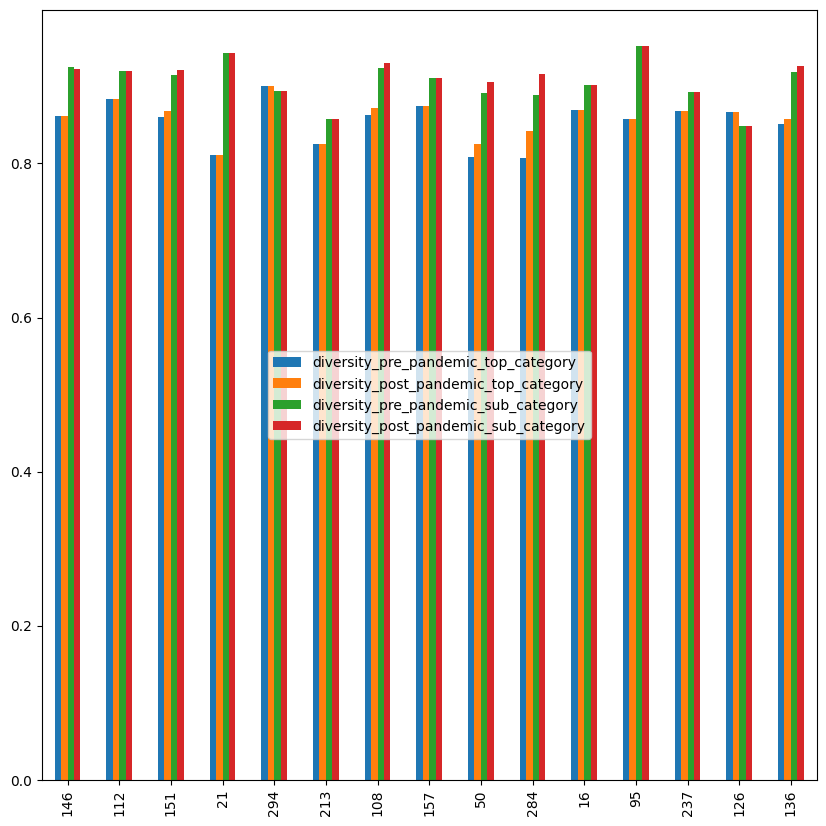

In [26]:
by_city[["diversity_pre_pandemic_top_category", "diversity_post_pandemic_top_category", "diversity_pre_pandemic_sub_category", "diversity_post_pandemic_sub_category"]].head(15).plot.bar(figsize=(10,10))
plt.legend(loc='center')